In [239]:
import zipfile
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.colors

In [241]:
import seaborn as sns
import warnings ; warnings.filterwarnings('ignore')
import matplotlib as plt
import pandas as pd
from matplotlib import pyplot as plt

In [242]:
# Open the ZIP file
# Correct Windows path using raw string
zip_path = r"C:\Users\Harsh Sharma\Downloads\Netflix.zip"

# Open the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # List all files inside the ZIP
    print("Files inside ZIP:")
    print(zip_ref.namelist())  # <-- Look at this output to find the exact CSV name

    # Use the exact CSV filename from the list
    csv_file_name = 'netflix_titles.csv'  # <-- Replace with the actual CSV name inside ZIP

    # Read CSV from ZIP without extracting
    with zip_ref.open(csv_file_name) as f:
        df = pd.read_csv(f)
        print(df.head())

Files inside ZIP:
['netflix_titles.csv']
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [244]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [245]:
df.iloc[0]

show_id                                                        s1
type                                                        Movie
title                                        Dick Johnson Is Dead
director                                          Kirsten Johnson
cast                                                          NaN
country                                             United States
date_added                                     September 25, 2021
release_year                                                 2020
rating                                                      PG-13
duration                                                   90 min
listed_in                                           Documentaries
description     As her father nears the end of his life, filmm...
Name: 0, dtype: object

In [246]:
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100
    if null_rate > 0:
        print(f"{i} null rate: {round(null_rate, 2)}%")

director null rate: 29.91%
cast null rate: 9.37%
country null rate: 9.44%
date_added null rate: 0.11%
rating null rate: 0.05%
duration null rate: 0.03%


In [247]:
# replacemnt of null element
df['country']=df['country'].fillna(df['country'].mode()[0])

In [248]:
# replacement of null element
df['cast'].replace(np.nan, 'no data', inplace=True)
df['director'].replace(np.nan, 'no data', inplace=True)

# drop na
df.dropna(inplace=True)
# drop duplicate
df.drop_duplicates(inplace= True)

In [249]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [250]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


Missing values dealt with, but the date isn't quite right yet...

In [251]:
print(df['date_added'].isna().sum())
print(df['date_added'].dtype)


0
object


In [252]:
df["date_added"] = pd.to_datetime(df['date_added'], errors='coerce')

# Drop rows with invalid or missing dates
df = df.dropna(subset=['date_added'])

# Create new columns from datetime
df = df.assign(
    year_added = df['date_added'].dt.year,
    month_added = df['date_added'].dt.month,
    month_name_added = df['date_added'].dt.month_name()
)

df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,month_name_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,no data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,September
1,s2,TV Show,Blood & Water,no data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,September
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,September


In [253]:
title_to_search = "Baki hanma"

result = df[df['title'] == title_to_search]

print(result)


Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description, year_added, month_added, month_name_added]
Index: []


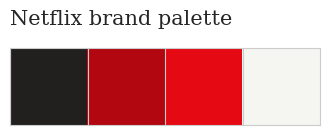

In [254]:
# Palette
sns.palplot(['#221f1f', '#b20710', '#e50914','#f5f5f1'])

plt.title("Netflix brand palette ",loc='left',fontfamily='serif',fontsize=15,y=1.2)
plt.show()

In [255]:
# Quick feature engineering

# Helper column for various plots
df['count'] = 1

# Many productions have several countries listed - this will skew our results , we'll grab the first one mentioned

# Lets retrieve just the first country
df['first_country'] = df['country'].apply(lambda x: x.split(",")[0])
df['first_country'].head()
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df['target_ages'] = df['rating'].replace(ratings_ages)
df['target_ages'].unique()

# Genre

df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(','))

# Reducing name length

df['first_country'].replace('United States', 'USA', inplace=True)
df['first_country'].replace('United Kingdom', 'UK',inplace=True)
df['first_country'].replace('South Korea', 'S. Korea',inplace=True)

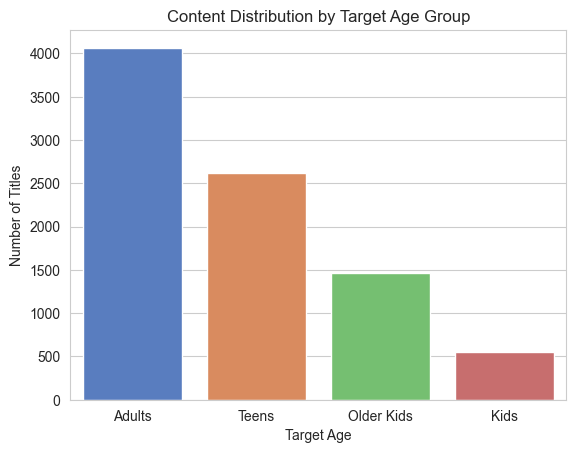

In [256]:
age_dist = df['target_ages'].value_counts()

sns.barplot(x=age_dist.index, y=age_dist.values, palette='muted')
plt.title("Content Distribution by Target Age Group")
plt.xlabel("Target Age")
plt.ylabel("Number of Titles")
plt.show()

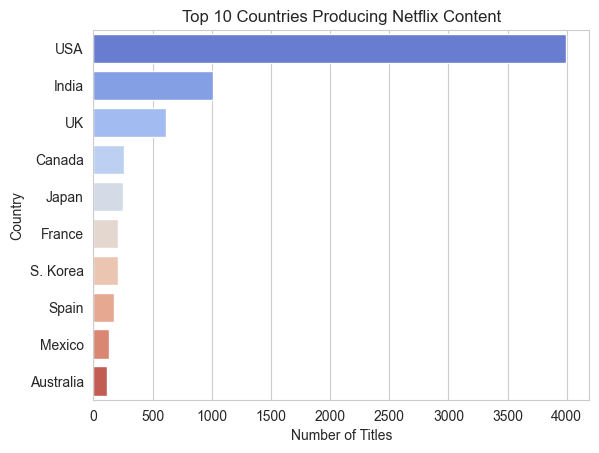

In [269]:
top_countries = df['first_country'].value_counts().head(10)

sns.barplot(y=top_countries.index, x=top_countries.values, palette='coolwarm')
plt.title("Top 10 Countries Producing Netflix Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

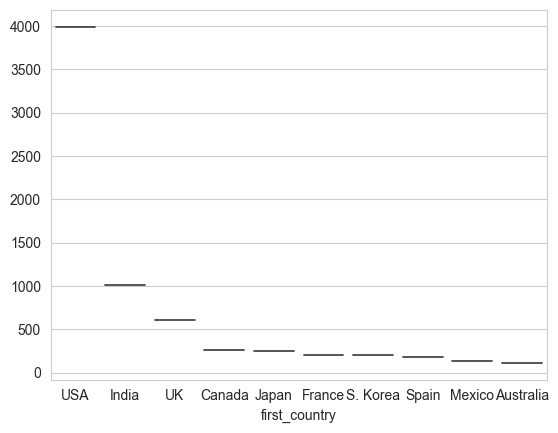

In [279]:
sns.violinplot(x =top_countries.index, y=top_countries.values )
plt.show()

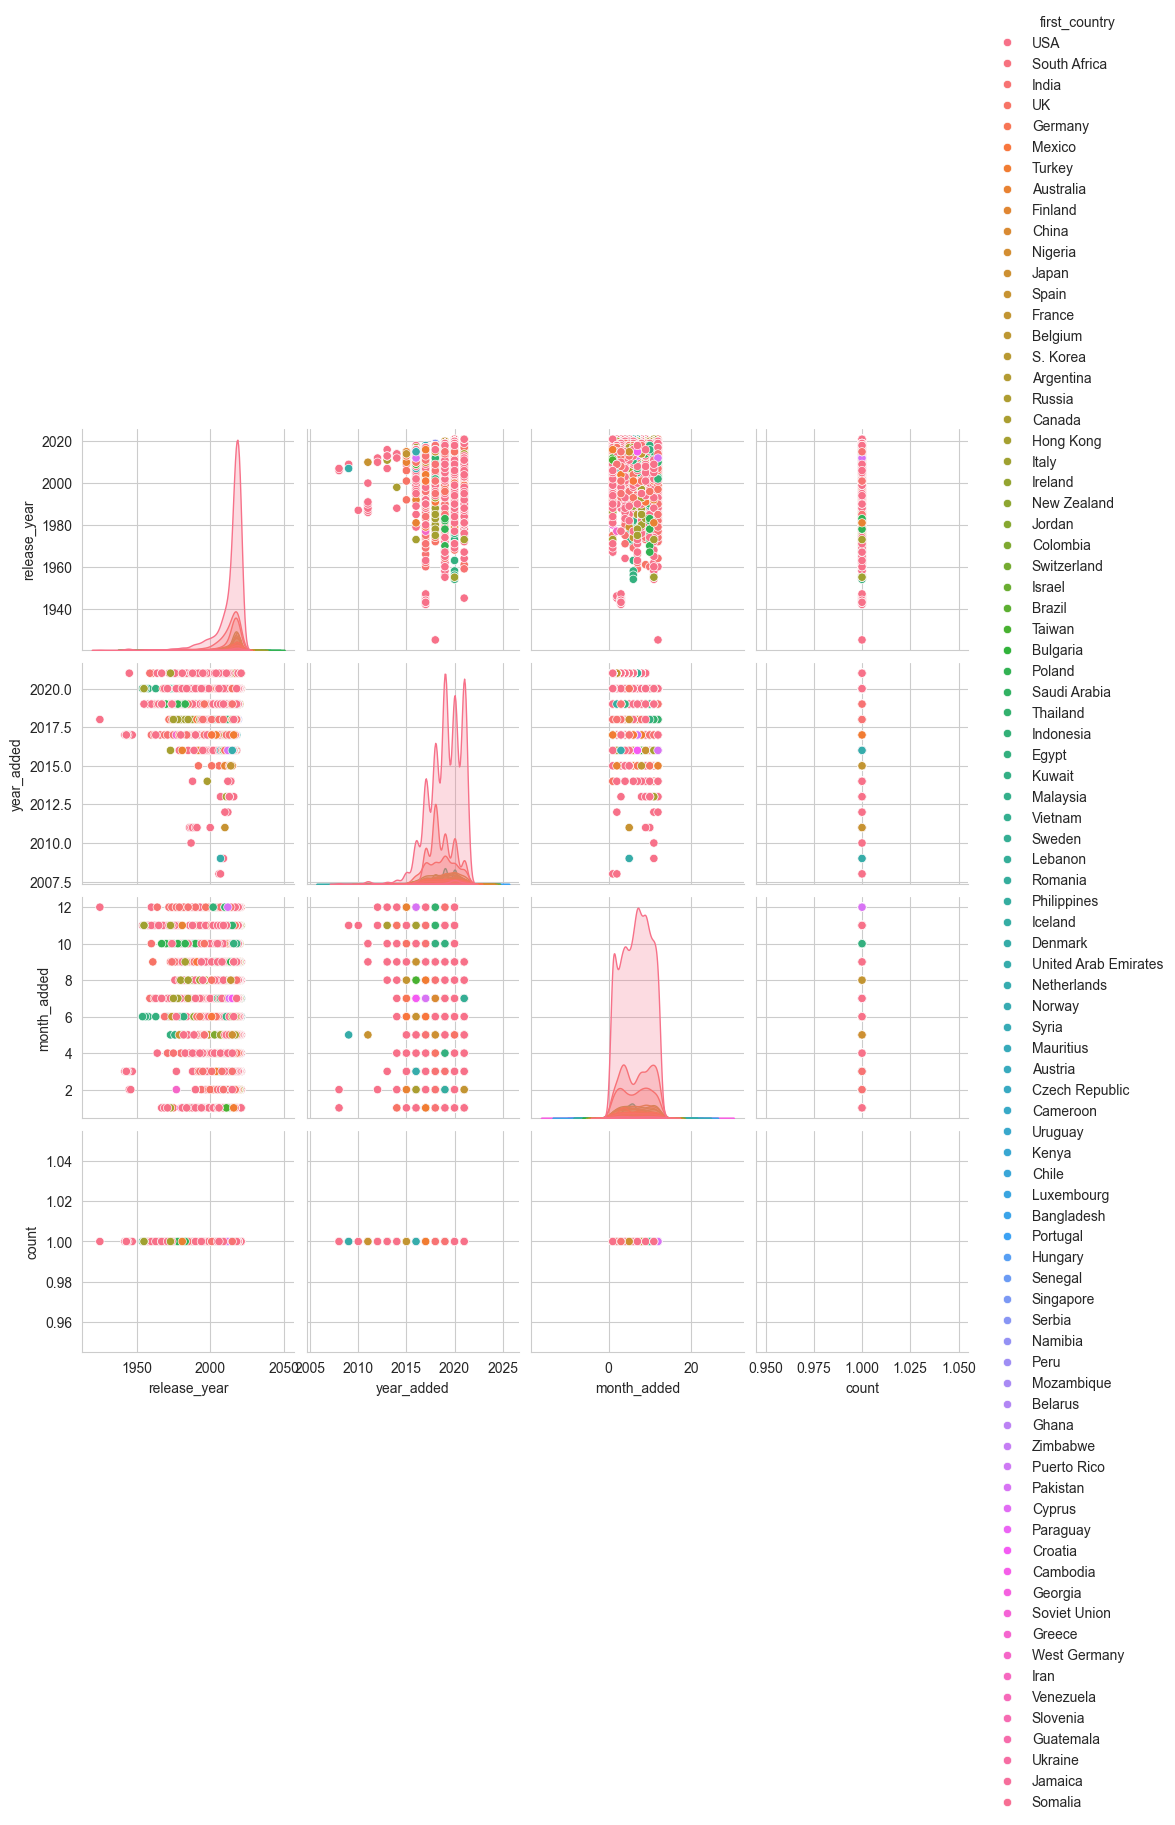

In [281]:
sns.pairplot(df, hue='first_country')
plt.show()